# Exploratory Data Analysis of Mercedes-Benz Greener Manufacturing Data

06/18/2017

In this notebook, I explored the data from Mercedes-Benz (https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# 1. Load Data Sets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Shape of Train Dataset: ", train.shape)
print("Shape of Test Dataset: ", test.shape)

Shape of Train Dataset:  (4209, 378)
Shape of Test Dataset:  (4209, 377)


## 1.1 Data Types of Columns

In [3]:
train_dtypes = train.dtypes.reset_index().groupby(0).count().reset_index()
train_dtypes.columns = ['data_type', 'count_of_columns']
train_dtypes

,data_type,count_of_columns
0,int64,369
1,float64,1
2,object,8


In [4]:
train.head(3)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0


In [5]:
for i in range(10, 378):
    num_uniq_vals = len(train.iloc[:, i].unique())
    if num_uniq_vals > 2:
        print(train.iloc[:, i].name)
    if num_uniq_vals == 1:
        print(train.iloc[:, i].name, 1)

X11 1
X93 1
X107 1
X233 1
X235 1
X268 1
X289 1
X290 1
X293 1
X297 1
X330 1
X347 1


In [6]:
test.head(3)

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
for i in range(9, 377):
    num_uniq_vals = len(test.iloc[:, i].unique())
    if num_uniq_vals > 2:
        print(test.iloc[:, i].name)
    if num_uniq_vals == 1:
        print(test.iloc[:, i].name, 1)

X257 1
X258 1
X295 1
X296 1
X369 1


Only column 'y' is float. ID, X0 to X10 (X9 is not in the datasets) are strings. And X10 to X385 are integers. Some columns in the train data set have only 1 unique value. So does the test data set. But no same column in train and test data sets has only 1 unique value.

## 1.2 Missing Values

In [8]:
train_nas = train.isnull().sum(axis=0).reset_index()
train_nas.columns = ['column_name', 'count_of_nas']
train_nas.loc[train_nas.count_of_nas > 0]

,column_name,count_of_nas


In [9]:
test_nas = test.isnull().sum(axis=0).reset_index()
test_nas.columns = ['column_name', 'count_of_nas']
test_nas.loc[test_nas.count_of_nas > 0]

,column_name,count_of_nas


Both train and test datasets have no missing values.

## 1.3 Combine Train and Test Data

Combine the train (except for 'y' column) and test together:

In [10]:
train_X_cols = list(range(train.shape[1]))
del train_X_cols[1]
dfs_X = pd.concat([train.iloc[:, train_X_cols], test])
dfs_X = dfs_X.reset_index(drop=True)
dfs_X.tail()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
8413,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
8414,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
8415,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
8416,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0
8417,8416,t,aa,ai,c,d,aa,g,r,0,...,1,0,0,0,0,0,0,0,0,0


# 2. Exploratory Analysis of Train Data

# 2.1 y

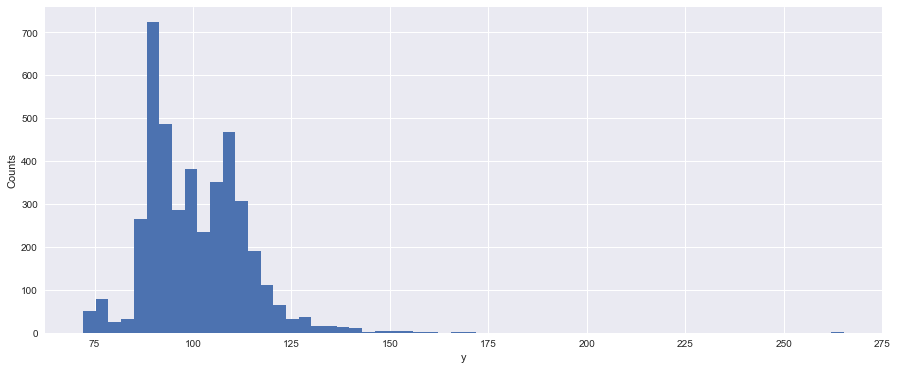

In [11]:
plt.figure(figsize=(15, 6))
plt.hist(train.loc[:, 'y'], bins = 60)
plt.xlabel('y')
plt.ylabel('Counts')

In the train dataset, the y value is between 72.11 to 265.32. The bin between 88.21083333 and 91.431 has most counts. The distribution is right skewed.

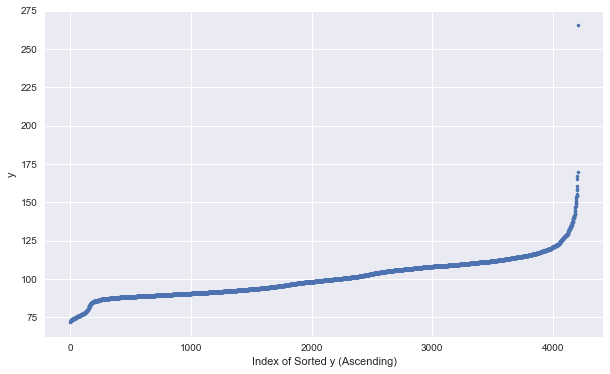

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(np.sort(train.loc[:, 'y'].values), '.')
plt.xlabel('Index of Sorted y (Ascending)')
plt.ylabel('y')

Small amount of ys are above 120. One point is much larger than the rest of the points.

In [13]:
print(len(train[train['y'] > 120]))
print(len(train[train['y'] > 120])/train.shape[0])

220
0.05226894749346638


In 4209 records of train data, only 220 records (~5%) have y more than 120.

## 2.2 ID vs. y

(70, 175)

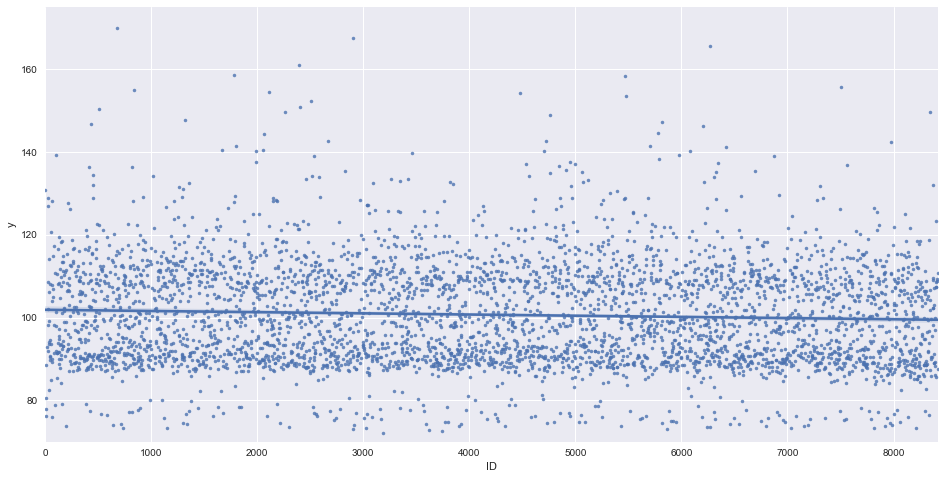

In [14]:
plt.figure(figsize=(16, 8))
sns.regplot(x = 'ID', y = 'y', data=train, marker = '.')
plt.xlabel('ID')
plt.ylabel('y')
plt.xlim((0, 8418))
plt.ylim((70, 175))

Interestingly, the y value slightly descreases with the increasing of the IDs. 

## 2.3 X0-X8

In [15]:
cate_cols = train.columns[2:10]
for col in cate_cols:
    print(col, len(train[col].unique()))

X0 47
X1 27
X2 44
X3 7
X4 4
X5 29
X6 12
X8 25


### 2.3.1 X0 vs. y

In [16]:
y_X0_train = train[['X0','y']].groupby(['X0']).agg(['mean', 'count']).reset_index().sort_values(('y', 'mean'))
y_X0_train.columns = ['X0', 'y_mean', 'y_count']
y_X0_train

,X0,y_mean,y_count
23,bc,76.195000,6
20,az,78.025543,175
3,ac,89.620000,1
33,l,90.923750,16
10,am,91.305556,18
21,b,92.594545,11
26,e,93.040312,32
37,q,93.205000,2
9,al,93.221343,67
35,n,93.491333,195


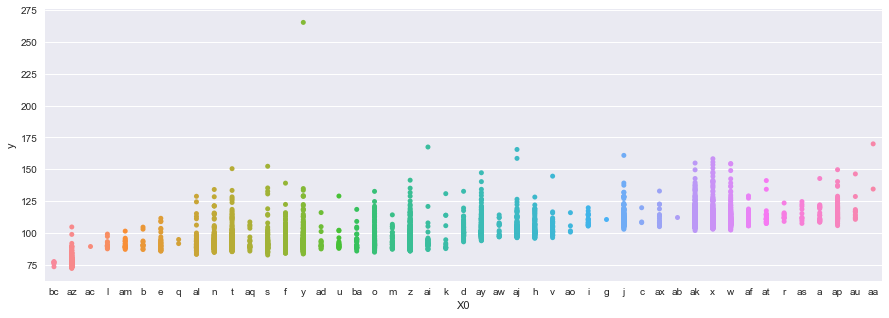

In [17]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='X0', y='y', data=train, order=y_X0_train.X0.values)

(70, 175)

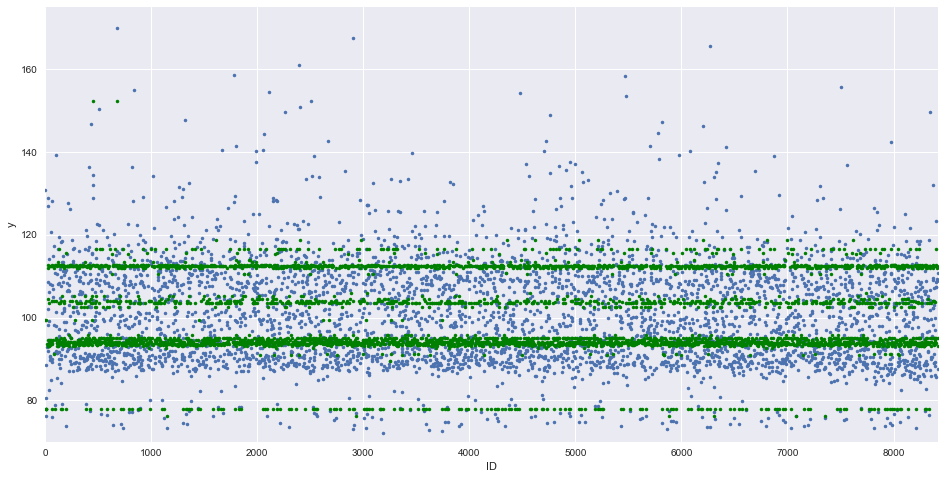

In [18]:
train_with_avg_y_X0 = train.copy().merge(y_X0_train, on = 'X0', how = 'left')

plt.figure(figsize=(16, 8))
plt.plot(train.ID.values, train.y.values, '.', train_with_avg_y_X0.ID.values, train_with_avg_y_X0.y_mean.values, 'g.')
plt.xlabel('ID')
plt.ylabel('y')
plt.xlim((0, 8418))
plt.ylim((70, 175))

Blue points in the plot above represents y corresponding to each ID. Green points represents the average y in a X0 group for a ID (a record). 4 bands are clearly seen. Another band between 115 to 120 does not include as many records as the other 4 bands, but it is visible in the plot above. 

### 2.3.2 X1 vs. y

In [19]:
y_X1_train = train[['X1','y']].groupby(['X1']).agg(['mean', 'count']).reset_index().sort_values(('y', 'mean'))
y_X1_train.columns = ['X1', 'y_mean', 'y_count']
y_X1_train

,X1,y_mean,y_count
25,y,77.955217,23
21,t,93.723226,31
26,z,95.229130,46
24,w,95.764808,52
16,o,96.316707,82
2,ab,97.350000,3
5,d,98.496667,3
0,a,99.116224,143
3,b,99.837365,592
18,q,99.866667,3


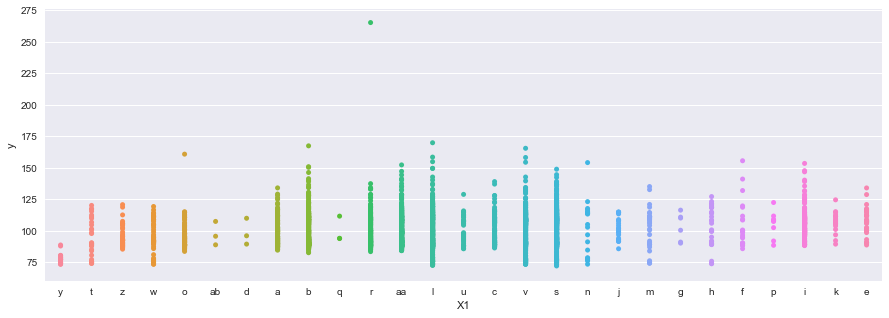

In [20]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='X1', y='y', data=train, order=y_X1_train.X1.values)

(70, 175)

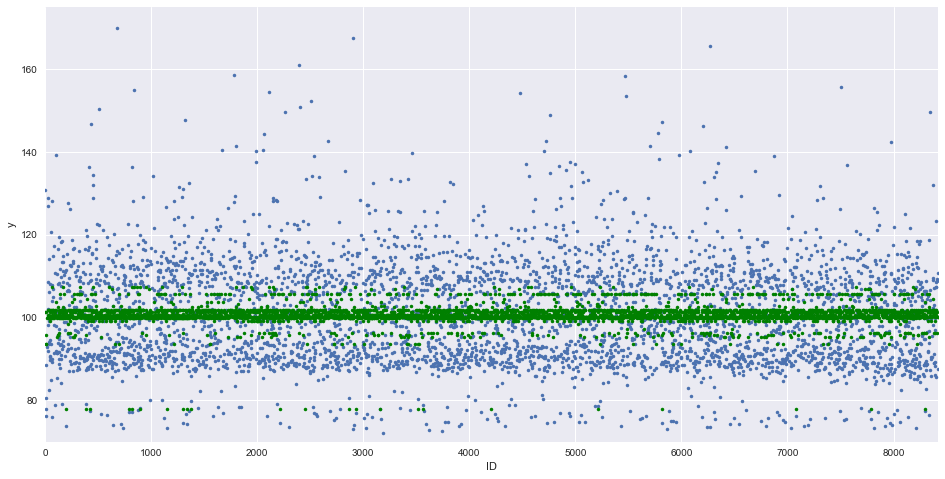

In [21]:
train_with_avg_y_X1 = train.copy().merge(y_X1_train, on = 'X1', how = 'left')

plt.figure(figsize=(16, 8))
plt.plot(train.ID.values, train.y.values, '.', train_with_avg_y_X1.ID.values, train_with_avg_y_X1.y_mean.values, 'g.')
plt.xlabel('ID')
plt.ylabel('y')
plt.xlim((0, 8418))
plt.ylim((70, 175))

Most of average y in terms of X1 concentrates in one band around 100.

### 2.3.3 X2 vs. y

In [22]:
y_X2_train = train[['X2','y']].groupby(['X2']).agg(['mean', 'count']).reset_index().sort_values(('y', 'mean'))
y_X2_train.columns = ['X2', 'y_mean', 'y_count']
y_X2_train

,X2,y_mean,y_count
34,n,83.369927,137
30,j,87.720000,1
2,ac,88.880769,13
5,ag,92.527368,19
26,f,93.803678,87
7,ai,94.136482,415
24,d,94.180556,18
19,av,95.510000,4
33,m,96.815967,367
22,b,96.878571,21


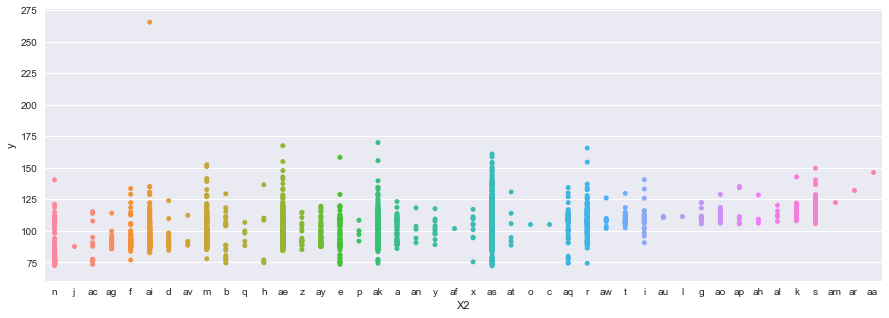

In [23]:
plt.figure(figsize=(15, 5))
sns.stripplot(x='X2', y='y', data=train, order=y_X2_train.X2.values)

(70, 175)

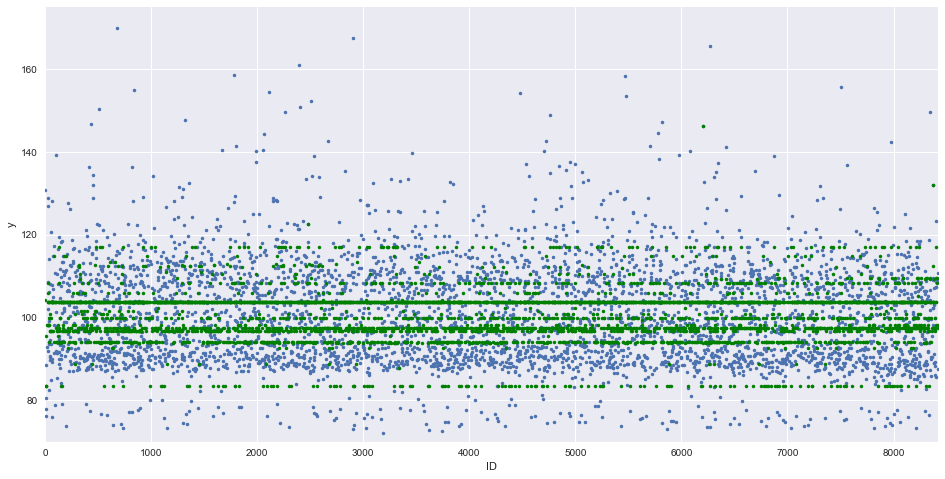

In [24]:
train_with_avg_y_X2 = train.copy().merge(y_X2_train, on = 'X2', how = 'left')

plt.figure(figsize=(16, 8))
plt.plot(train.ID.values, train.y.values, '.', train_with_avg_y_X2.ID.values, train_with_avg_y_X2.y_mean.values, 'g.')
plt.xlabel('ID')
plt.ylabel('y')
plt.xlim((0, 8418))
plt.ylim((70, 175))

8 bands are visible. The bands around 92, 97, 105 have most records.

### 2.3.4 X3 vs. y

In [25]:
train['X3'].value_counts()

c    1942
f    1076
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

In [26]:
y_X3_train = train[['X3','y']].groupby(['X3']).agg(['mean', 'count']).reset_index().sort_values(('y', 'mean'))
y_X3_train.columns = ['X3', 'y_mean', 'y_count']
y_X3_train

,X3,y_mean,y_count
5,f,96.564507,1076
4,e,100.033190,163
1,b,100.239649,57
6,g,100.428672,241
2,c,101.959269,1942
0,a,102.507477,440
3,d,105.114414,290


### 2.3.5 X4

In [27]:
train['X4'].value_counts()

d    4205
a       2
b       1
c       1
Name: X4, dtype: int64

Almost all records have X4 = d.

### 2.3.6 X5

In [28]:
y_X5_train = train[['X5','y']].groupby(['X5']).agg(['mean', 'count']).reset_index().sort_values(('y', 'mean'))
y_X5_train.columns = ['X5', 'y_mean', 'y_count']
y_X5_train

,X5,y_mean,y_count
12,h,78.020000,1
27,x,78.440000,2
28,y,88.530000,1
11,g,92.930000,1
19,o,96.107500,20
0,aa,98.672500,112
22,r,98.705395,215
26,w,98.707100,231
7,ah,98.853505,97
16,l,99.657436,195


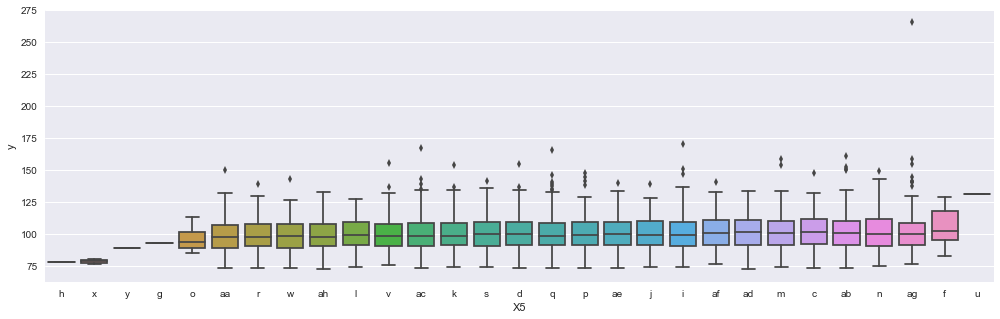

In [29]:
plt.figure(figsize=(17, 5))
sns.boxplot(x='X5', y='y', data=train, order=y_X5_train.X5.values)
# plt.ylim([70, 175])

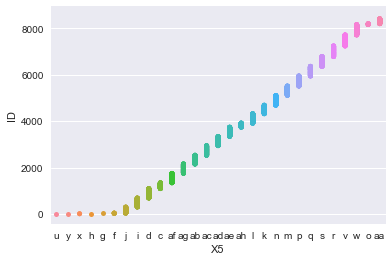

In [30]:
sns.stripplot(x="X5", y="ID", data=train)

X5 are groups of IDs.

### 2.3.7 X6

In [31]:
y_X6_train = train[['X6','y']].groupby(['X6']).agg(['mean', 'count']).reset_index().sort_values(('y', 'mean'))
y_X6_train.columns = ['X6', 'y_mean', 'y_count']
y_X6_train

,X6,y_mean,y_count
5,f,94.814500,20
0,a,97.802524,206
1,b,98.714286,28
11,l,98.945502,478
6,g,100.306286,1042
9,j,101.165245,1039
8,i,101.226803,488
3,d,101.346464,625
10,k,102.074884,43
7,h,103.134842,190


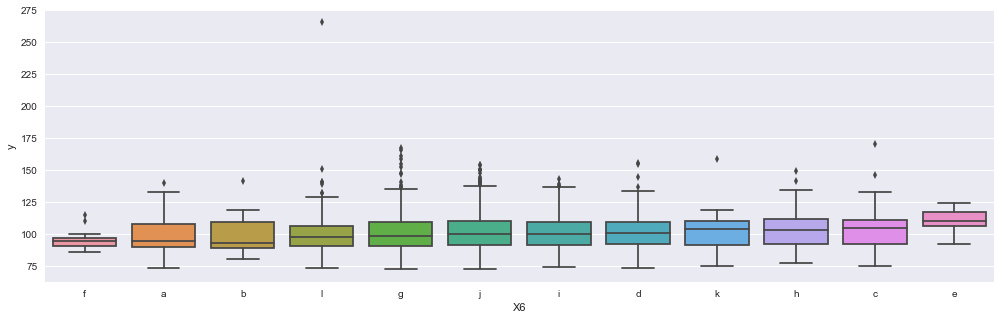

In [32]:
plt.figure(figsize=(17, 5))
sns.boxplot(x='X6', y='y', data=train, order=y_X6_train.X6.values)
# plt.ylim([70, 175])

### 2.3.8 X8

In [33]:
y_X8_train = train[['X8','y']].groupby(['X8']).agg(['mean', 'count']).reset_index().sort_values(('y', 'mean'))
y_X8_train.columns = ['X8', 'y_mean', 'y_count']
y_X8_train

,X8,y_mean,y_count
5,f,96.230700,243
14,o,97.746933,163
11,l,98.346139,101
23,x,98.577238,105
18,s,98.915961,255
22,w,99.134439,196
15,p,99.389700,100
1,b,99.485421,190
3,d,99.742136,103
2,c,100.112900,100


The number of records in each category is roughly in the same level. No big difference.

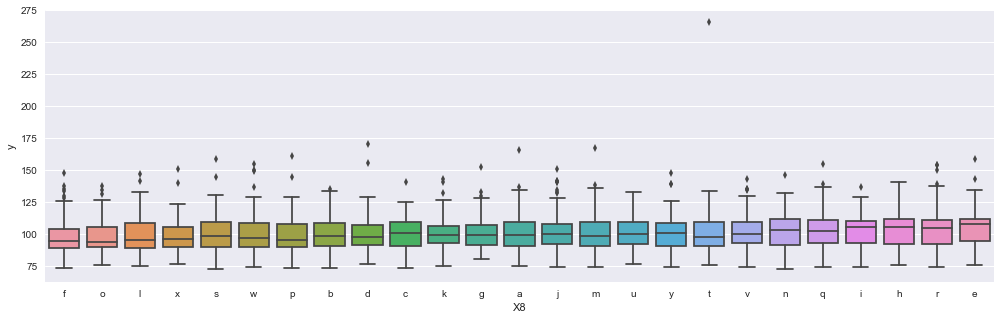

In [34]:
plt.figure(figsize=(17, 5))
sns.boxplot(x='X8', y='y', data=train, order=y_X8_train.X8.values)

# 3. Exploratory Analysis of Train and Test Data Sets

## 3.1 X0-X8

Number of unique values in test set:

In [35]:
cate_cols = test.columns[1:9]
for col in cate_cols:
    print(col, len(test[col].unique()))

X0 49
X1 27
X2 45
X3 7
X4 4
X5 32
X6 12
X8 25


Next investigate if X0-X8 in the train and test data sets have the same unique values:

In [36]:
lst_8obj_train = [0]*8
for i in range(2, 10):
    lst_8obj_train[i-2] = train.iloc[:, i].unique()
    
lst_8obj_test = [0]*8
for i in range(1, 9):
    lst_8obj_test[i-1] = test.iloc[:, i].unique()

for j in range(8):
    if set(lst_8obj_train[j]) == set(lst_8obj_test[j]):
        if j < 7:
            print('Unique values of X%d in TRAIN data equals Unique values of X%d in TEST data' % (j, j))
        else:
            print('Unique values of X%d in TRAIN data equals Unique values of X%d in TEST data' % (j+1, j+1))
    else:
        if j < 7:
            print('Unique values of X%d in TRAIN data but NOT in X%d of TEST data:' % (j, j), set(lst_8obj_train[j]) - set(lst_8obj_test[j]))
            print('Unique values of X%d in TEST data but NOT in X%d of TRAIN data:' % (j, j), set(lst_8obj_test[j]) - set(lst_8obj_train[j]))
        else:
            print('Unique values of X%d in TRAIN data but NOT in X%d of TEST data:' % (j+1, j+1), set(lst_8obj_train[j]) - set(lst_8obj_test[j]))
            print('Unique values of X%d in TEST data but NOT in X%d of TRAIN data:' % (j+1, j+1), set(lst_8obj_test[j]) - set(lst_8obj_train[j]))            

Unique values of X0 in TRAIN data but NOT in X0 of TEST data: {'ab', 'q', 'aa', 'ac'}
Unique values of X0 in TEST data but NOT in X0 of TRAIN data: {'p', 'bb', 'an', 'ae', 'ag', 'av'}
Unique values of X1 in TRAIN data equals Unique values of X1 in TEST data
Unique values of X2 in TRAIN data but NOT in X2 of TEST data: {'l', 'c', 'aa', 'ar', 'o'}
Unique values of X2 in TEST data but NOT in X2 of TRAIN data: {'u', 'aj', 'ab', 'w', 'ad', 'ax'}
Unique values of X3 in TRAIN data equals Unique values of X3 in TEST data
Unique values of X4 in TRAIN data equals Unique values of X4 in TEST data
Unique values of X5 in TRAIN data but NOT in X5 of TEST data: {'u'}
Unique values of X5 in TEST data but NOT in X5 of TRAIN data: {'a', 't', 'b', 'z'}
Unique values of X6 in TRAIN data equals Unique values of X6 in TEST data
Unique values of X8 in TRAIN data equals Unique values of X8 in TEST data


Depending upon the importance of the features, variables with values only in test data not in train data might affect prediction of y.

### 3.1.1 X0

In [37]:
X0_cnt_train = train['X0'].value_counts().reset_index()
X0_cnt_test = test['X0'].value_counts().reset_index()
X0_cnt = X0_cnt_train.merge(X0_cnt_test, on = 'index', how = 'outer')
X0_cnt.columns = ['X0', 'counts_in_train', 'counts_in_test']
X0_cnt

,X0,counts_in_train,counts_in_test
0,z,360.0,335.0
1,ak,349.0,432.0
2,y,324.0,348.0
3,ay,313.0,299.0
4,t,306.0,293.0
5,x,300.0,302.0
6,o,269.0,246.0
7,f,227.0,213.0
8,n,195.0,167.0
9,w,182.0,198.0


Each value of X0 have very similar number of records in train and test data sets. Fortunately, only 1 record is in test set for for each of X0 value only in test set.

### 3.1.2 X1

In [38]:
X1_cnt_train = train['X1'].value_counts().reset_index()
X1_cnt_test = test['X1'].value_counts().reset_index()
X1_cnt = X1_cnt_train.merge(X1_cnt_test, on = 'index', how = 'outer')
X1_cnt.columns = ['X1', 'counts_in_train', 'counts_in_test']
X1_cnt

,X1,counts_in_train,counts_in_test
0,aa,833,826
1,s,598,602
2,b,592,596
3,l,590,599
4,v,408,436
5,r,251,252
6,i,203,189
7,a,143,153
8,c,121,142
9,o,82,81


Each value of X1 have very similar number of records in train and test data sets.

### 3.1.3 X2

In [39]:
X2_cnt_train = train['X2'].value_counts().reset_index()
X2_cnt_test = test['X2'].value_counts().reset_index()
X2_cnt = X2_cnt_train.merge(X2_cnt_test, on = 'index', how = 'outer')
X2_cnt.columns = ['X2', 'counts_in_train', 'counts_in_test']
X2_cnt

,X2,counts_in_train,counts_in_test
0,as,1659.0,1658.0
1,ae,496.0,478.0
2,ai,415.0,462.0
3,m,367.0,348.0
4,ak,265.0,260.0
5,r,153.0,155.0
6,n,137.0,113.0
7,s,94.0,100.0
8,f,87.0,85.0
9,e,81.0,84.0


Each value of X2 have very similar number of records in train and test data sets. only at most a few records are in test set for for each of X2 value only in test set.

### 3.1.4 X3

In [40]:
X3_cnt_train = train['X3'].value_counts().reset_index()
X3_cnt_test = test['X3'].value_counts().reset_index()
X3_cnt = X3_cnt_train.merge(X3_cnt_test, on = 'index', how = 'outer')
X3_cnt.columns = ['X3', 'counts_in_train', 'counts_in_test']
X3_cnt

,X3,counts_in_train,counts_in_test
0,c,1942,1900
1,f,1076,1083
2,a,440,476
3,d,290,274
4,g,241,272
5,e,163,158
6,b,57,46


### 3.1.5 X4

In [41]:
X4_cnt_train = train['X4'].value_counts().reset_index()
X4_cnt_test = test['X4'].value_counts().reset_index()
X4_cnt = X4_cnt_train.merge(X4_cnt_test, on = 'index', how = 'outer')
X4_cnt.columns = ['X4', 'counts_in_train', 'counts_in_test']
X4_cnt

,X4,counts_in_train,counts_in_test
0,d,4205,4203
1,a,2,1
2,b,1,4
3,c,1,1


### 3.1.6 X5

In [42]:
X5_cnt_train = train['X5'].value_counts().reset_index()
X5_cnt_test = test['X5'].value_counts().reset_index()
X5_cnt = X5_cnt_train.merge(X5_cnt_test, on = 'index', how = 'outer')
X5_cnt.columns = ['X5', 'counts_in_train', 'counts_in_test']
X5_cnt

,X5,counts_in_train,counts_in_test
0,w,231.0,218.0
1,v,231.0,246.0
2,q,220.0,197.0
3,r,215.0,239.0
4,d,214.0,192.0
5,s,214.0,205.0
6,n,212.0,209.0
7,m,208.0,197.0
8,p,208.0,227.0
9,i,207.0,180.0


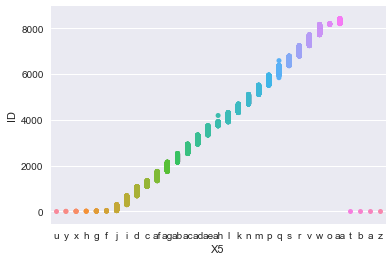

In [43]:
sns.stripplot(x="X5", y="ID", data=dfs_X)

### 3.1.7 X6

In [44]:
X6_cnt_train = train['X6'].value_counts().reset_index()
X6_cnt_test = test['X6'].value_counts().reset_index()
X6_cnt = X6_cnt_train.merge(X6_cnt_test, on = 'index', how = 'outer')
X6_cnt.columns = ['X6', 'counts_in_train', 'counts_in_test']
X6_cnt

,X6,counts_in_train,counts_in_test
0,g,1042,1073
1,j,1039,1002
2,d,625,589
3,i,488,490
4,l,478,473
5,a,206,196
6,h,190,218
7,k,43,67
8,c,38,40
9,b,28,19


### 3.1.8 X8

In [45]:
X8_cnt_train = train['X8'].value_counts().reset_index()
X8_cnt_test = test['X8'].value_counts().reset_index()
X8_cnt = X8_cnt_train.merge(X8_cnt_test, on = 'index', how = 'outer')
X8_cnt.columns = ['X8', 'counts_in_train', 'counts_in_test']
X8_cnt

,X8,counts_in_train,counts_in_test
0,j,277,256
1,s,255,244
2,f,243,241
3,n,242,236
4,i,237,234
5,e,225,274
6,r,219,228
7,a,210,202
8,w,196,192
9,v,194,174


## 3.2 Binary Variables

We have seen some columns only have one unique value. Here we will further investigate the distribution of values for the binary columns.

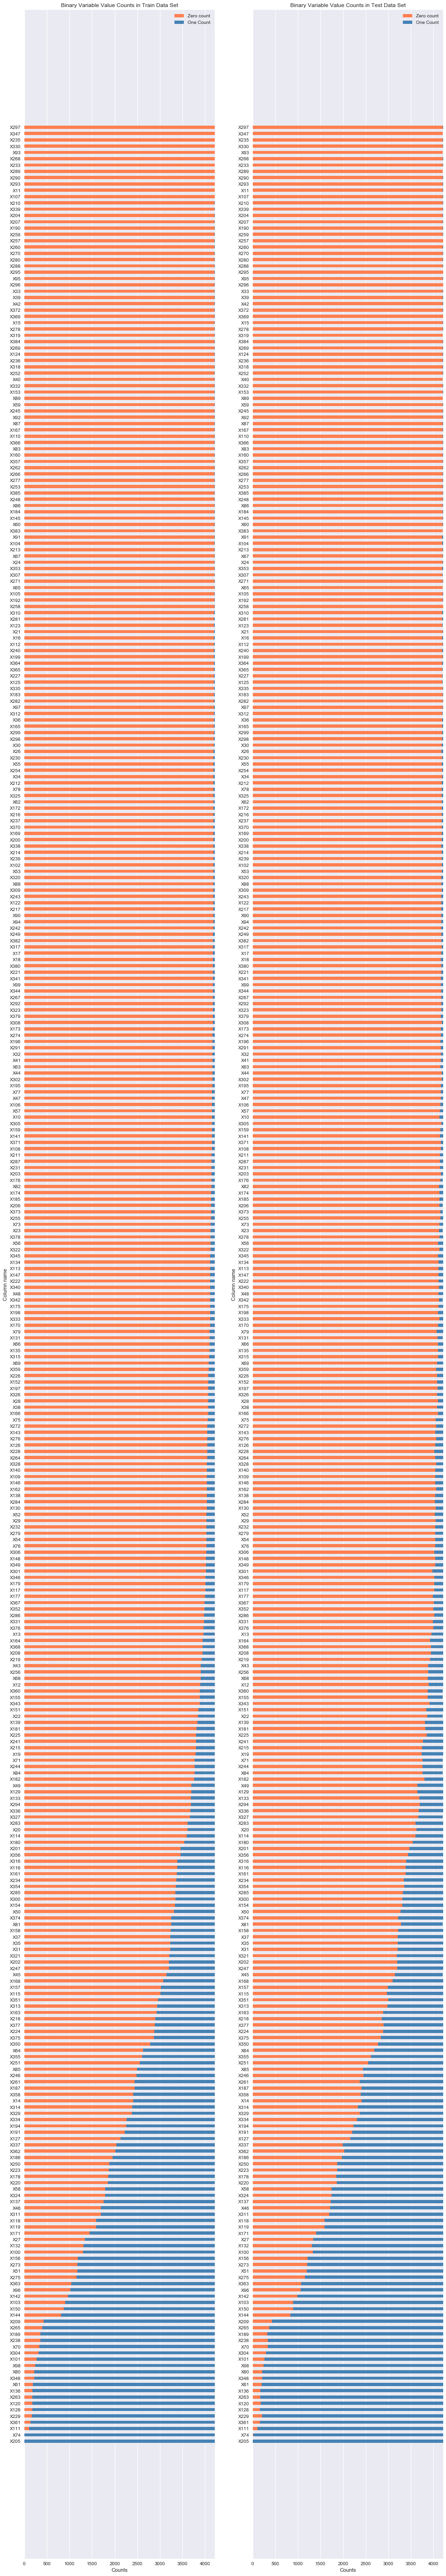

In [46]:
num_zeros_train_lst = []
num_ones_train_lst = []
num_zeros_test_lst = []
num_ones_test_lst = []

for i in range(10, 378):
    num_ones_train_lst.append(sum(train.iloc[:, i].values))
    num_zeros_train_lst.append(train.shape[0] - sum(train.iloc[:, i].values))
    
for i in range(9, 377):
    num_ones_test_lst.append(sum(test.iloc[:, i].values))
    num_zeros_test_lst.append(test.shape[0] - sum(test.iloc[:, i].values))
    
binary_cnt = pd.DataFrame({'col_names': train.iloc[:, 10:378].columns, 'num_zeros_train': num_zeros_train_lst, 
                           'num_ones_train': num_ones_train_lst, 'num_zeros_test': num_zeros_test_lst, 
                           'num_ones_test': num_ones_test_lst})
binary_cnt = binary_cnt.sort_values('num_zeros_train')

ind=np.arange(binary_cnt.shape[0])
col_names_lst = binary_cnt['col_names'].values.tolist()

width = 0.5
plt.figure(1)
plt.figure(figsize=(16,100))
plt.subplot(121)
p1 = plt.barh(ind, binary_cnt.num_zeros_train.values, width, color='coral')
p2 = plt.barh(ind, binary_cnt.num_ones_train.values, width, left=binary_cnt.num_zeros_train.values, color="steelblue")
plt.title('Binary Variable Value Counts in Train Data Set')
plt.xlabel('Counts')
plt.ylabel('Column name')
plt.yticks(ind, col_names_lst)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))

plt.subplot(122)
p1 = plt.barh(ind, binary_cnt.num_zeros_test.values, width, color='coral')
p2 = plt.barh(ind, binary_cnt.num_ones_test.values, width, left=binary_cnt.num_zeros_test.values, color="steelblue")
plt.title('Binary Variable Value Counts in Test Data Set')
plt.xlabel('Counts')
plt.ylabel('Column name')
plt.yticks(ind, col_names_lst)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))

The value distribution of binary variables are quite silimar for train and test data.

In [47]:
print('Train:', len(binary_cnt[binary_cnt.num_ones_train < train.shape[0]*0.01]))
print('Test:', len(binary_cnt[binary_cnt.num_ones_test < test.shape[0]*0.01]))

Train: 145
Test: 144


Among all the 369 binary train variables, 145 have less than 1% data other than 0. 144 binary test variables have less than 1% data other than 0. Very sparse!  

# 4. Duplicated Records

In [48]:
dfs_X_dup = dfs_X[dfs_X.iloc[:, 1:].duplicated(keep = False)] 
print('Number of duplicates:', len(dfs_X_dup))
      
lst_dup = dfs_X_dup.groupby(list(dfs_X_dup)[1:]).apply(lambda x: list(x.index)).tolist()
print('Number of groups of duplicates:', len(lst_dup))
lst_dup[0:5]

Number of duplicates: 1499
Number of groups of duplicates: 561


[[5320, 5439], [5526, 5630], [3512, 3581], [3800, 7835], [905, 5119]]

Consider X variabeles (not including ID), among 8218 records of train and test data, 1499 are duplicates. There are 561 groups of duplicates.

Look into the train data set:

In [49]:
dup_ind_train = []
for i in range(len(lst_dup)):
    dup_gr = lst_dup[i]
    num_in_train = sum(elem < 4209 for elem in dup_gr)
    if num_in_train > 1:
        print(lst_dup[i])
        dup_ind_train.append(lst_dup[i])
        
print(len(dup_ind_train))

[3512, 3581]
[892, 913]
[3287, 3376, 7565]
[3070, 3133]
[1735, 1772]
[209, 263]
[1547, 1563]
[1560, 1616]
[167, 196]
[1689, 1796]
[1981, 2051, 2063]
[3220, 3325, 7430, 7501]
[3634, 3706, 3748, 3818]
[3913, 4009]
[1137, 1176]
[2235, 2325, 6419, 6502]
[2218, 2305, 6408, 6494]
[2145, 2149, 6173]
[2968, 3021, 7281]
[1361, 1457, 5584]
[1814, 1819, 1845, 5933, 5991, 6015]
[939, 1035, 1037, 1058, 1080, 5156, 5235, 5246]
[3914, 4061]
[13, 16, 51, 79, 130, 4232, 4259]
[3998, 4012, 8107, 8285]
[3974, 4008]
[1110, 1114, 1122, 1249]
[1586, 1608, 1635, 5769, 5804]
[1530, 1612, 5733, 5818]
[3013, 3111]
[3441, 3519]
[1744, 1815, 1861]
[4135, 4162, 8357]
[2014, 2067, 6165, 6229, 6249, 6297]
[2773, 2820]
[3195, 3327, 7408]
[3656, 3730]
[4049, 4064]
[1125, 1251]
[796, 824, 871, 4971, 5029, 5051, 5072]
[704, 771]
[633, 648]
[457, 538]
[448, 543, 4642, 4667]
[2182, 2193, 2238, 2316, 6383, 6414, 6557]
[2201, 2213, 6366, 6469, 6480, 6504, 6522, 6526, 6533]
[1984, 2003, 2138, 6331]
[2348, 2371]
[2508, 2519, 

There are 217 groups of duplicates have all/partial records from the train data.

In [50]:
dup_ind_test = []
for i in range(len(lst_dup)):
    dup_gr = lst_dup[i]
    num_in_test = sum(elem > 4208 for elem in dup_gr)
    if num_in_test > 1:
        print(lst_dup[i])
        dup_ind_test.append(lst_dup[i])
        
print(len(dup_ind_test))

[5320, 5439]
[5526, 5630]
[4778, 4781]
[6858, 6917]
[5035, 5077]
[7841, 7916]
[4592, 4694]
[6809, 6857]
[8232, 8288]
[4641, 4688]
[2765, 7050, 7063, 7149]
[7061, 7100]
[3270, 7468, 7481]
[3220, 3325, 7430, 7501]
[1259, 5301, 5448]
[1339, 5459, 5488, 5514, 5626]
[1292, 5500, 5507, 5636, 5661]
[1862, 5946, 6014]
[1726, 5910, 5993]
[2235, 2325, 6419, 6502]
[2218, 2305, 6408, 6494]
[6830, 6895]
[6589, 6613, 6670, 6690]
[2459, 6604, 6738]
[2402, 6699, 6719]
[2429, 6559, 6635]
[7635, 7689, 7754]
[3576, 7747, 7815]
[7620, 7727, 7743]
[3400, 7668, 7761]
[1814, 1819, 1845, 5933, 5991, 6015]
[939, 1035, 1037, 1058, 1080, 5156, 5235, 5246]
[4207, 8376, 8409]
[11, 4226, 4229, 4230]
[13, 16, 51, 79, 130, 4232, 4259]
[3998, 4012, 8107, 8285]
[5347, 5365]
[1586, 1608, 1635, 5769, 5804]
[1649, 5698, 5850]
[1530, 1612, 5733, 5818]
[5709, 5758]
[5921, 5928]
[4998, 5007]
[938, 5169, 5275]
[373, 4606, 4672]
[4443, 4496]
[52, 4332, 4344]
[4234, 4299]
[3604, 7610, 7695]
[3693, 7856, 8064]
[5322, 5426]
[1708

There are 217 groups of duplicates have all/partial records from the test data.

In [51]:
dup_ind_train_test = []
for i in range(len(lst_dup)):
    dup_gr = lst_dup[i]
    num_in_train = sum(elem < 4209 for elem in dup_gr)
    num_in_test = sum(elem > 4208 for elem in dup_gr)
    if (num_in_train > 0) & (num_in_test > 0):
        print(lst_dup[i])
        dup_ind_train_test.append(lst_dup[i])
        
print(len(dup_ind_train_test))

[3800, 7835]
[905, 5119]
[862, 5060]
[508, 4627]
[3287, 3376, 7565]
[691, 4987]
[165, 4524]
[250, 4430]
[872, 5006]
[2059, 6178]
[2867, 7191]
[2765, 7050, 7063, 7149]
[2878, 7169]
[3270, 7468, 7481]
[3220, 3325, 7430, 7501]
[3252, 7521]
[1259, 5301, 5448]
[1339, 5459, 5488, 5514, 5626]
[1292, 5500, 5507, 5636, 5661]
[1862, 5946, 6014]
[1726, 5910, 5993]
[2235, 2325, 6419, 6502]
[2218, 2305, 6408, 6494]
[2145, 2149, 6173]
[2126, 6310]
[2459, 6604, 6738]
[2402, 6699, 6719]
[2429, 6559, 6635]
[2790, 7175]
[2968, 3021, 7281]
[3576, 7747, 7815]
[3400, 7668, 7761]
[3994, 8148]
[1361, 1457, 5584]
[1814, 1819, 1845, 5933, 5991, 6015]
[939, 1035, 1037, 1058, 1080, 5156, 5235, 5246]
[671, 4818]
[2134, 6337]
[46, 4293]
[4207, 8376, 8409]
[11, 4226, 4229, 4230]
[13, 16, 51, 79, 130, 4232, 4259]
[3998, 4012, 8107, 8285]
[3094, 7320]
[1586, 1608, 1635, 5769, 5804]
[1518, 5881]
[1649, 5698, 5850]
[1530, 1612, 5733, 5818]
[938, 5169, 5275]
[1017, 5180]
[1883, 6127]
[373, 4606, 4672]
[481, 4594]
[271, 

341 groups have records in both the train dataset and test dataset. So, for those groups, we might use the y of the train dataset to project the y of the test dataset.

Now look into y of the duplicated records of train data:

In [52]:
y_dup_in_tr = [None]*len(dup_ind_train)

for i in range(len(dup_ind_train)):
    y_dup_in_tr[i] = []
    for j in range(len(dup_ind_train[i])):
        if dup_ind_train[i][j] < 4209:
            y_dup_in_tr[i].append(train.loc[dup_ind_train[i][j], 'y'])
            
y_dup_in_tr

[[121.56999999999999, 120.76000000000001],
 [99.480000000000004, 101.98],
 [105.08, 99.650000000000006],
 [106.95999999999999, 165.52000000000001],
 [106.52, 109.25],
 [113.11, 106.40000000000001],
 [110.47, 120.91],
 [125.91, 121.5],
 [106.14, 116.2],
 [110.88, 106.55],
 [103.84999999999999, 109.69, 105.94],
 [106.23, 116.93000000000001],
 [116.13, 104.56999999999999, 114.08, 116.36],
 [125.45, 108.69],
 [109.63, 122.65000000000001],
 [108.95999999999999, 108.05],
 [113.55, 121.79000000000001],
 [110.2, 108.8],
 [114.20999999999999, 108.02],
 [91.239999999999995, 112.88],
 [95.150000000000006, 88.310000000000002, 89.189999999999998],
 [88.640000000000001,
  89.75,
  93.780000000000001,
  93.340000000000003,
  97.430000000000007],
 [88.280000000000001, 111.09999999999999],
 [94.120000000000005,
  106.09999999999999,
  93.810000000000002,
  93.030000000000001,
  96.879999999999995],
 [87.680000000000007, 88.530000000000001],
 [89.959999999999994, 89.25],
 [109.78, 115.81999999999999, 12

In [53]:
big_diff_dup_lst = []

for i in range(len(y_dup_in_tr)):
    if max(y_dup_in_tr[i]) - min(y_dup_in_tr[i]) > 10:
        big_diff_dup_lst.append(dup_ind_train[i])
        
print(len(big_diff_dup_lst))
print(big_diff_dup_lst) 

62
[[3070, 3133], [1547, 1563], [167, 196], [3220, 3325, 7430, 7501], [3634, 3706, 3748, 3818], [3913, 4009], [1137, 1176], [1361, 1457, 5584], [3914, 4061], [13, 16, 51, 79, 130, 4232, 4259], [1110, 1114, 1122, 1249], [2014, 2067, 6165, 6229, 6249, 6297], [1125, 1251], [796, 824, 871, 4971, 5029, 5051, 5072], [633, 648], [2182, 2193, 2238, 2316, 6383, 6414, 6557], [2201, 2213, 6366, 6469, 6480, 6504, 6522, 6526, 6533], [2348, 2371], [3445, 3523], [2167, 2233], [351, 397], [2695, 2712, 6949], [2271, 2282, 6388, 6438, 6521], [2207, 2299], [2178, 2326], [978, 1003, 1077, 5103, 5233, 5251], [2708, 2733], [3638, 3762, 3775, 7853, 7890], [2978, 2983, 2992, 3007], [4110, 4133, 4160, 4163, 8369, 8383], [1513, 1625, 5705, 5744], [1680, 1868], [701, 718, 752, 854], [1128, 1162, 5291, 5342, 5440, 5452], [1281, 1286, 1412, 5642], [929, 943, 961, 5151, 5238], [608, 637], [693, 804, 4924], [390, 454, 493, 4657, 4718], [2989, 3059, 3100, 3176, 7333], [3496, 3513], [600, 604, 628], [3463, 3470, 3584]

In all 217 groups of duplicates including train data, the duplicated records of train data have y difference larger than 10 in 62 groups. The obvious question is what caused the big differnce of y for those duplicated records? Noise? Other factors not in this dataset?